In [5]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats
from ydata_profiling import ProfileReport

data = pd.read_csv("/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/data_processed.csv")


In [2]:
data

,CPT104,GEN_TENSIONE,IC113,PT212,TOV_POS,TT103,TT105,TT112,TT119,TT124,TT126,TT128,TT129,TT130,XT100,XT101,Fault
0,0.883561,-0.815526,0.855067,-0.025688,1.766344,-0.820402,0.966708,0.774370,0.805382,1.338136,-1.128361,-0.068951,-1.422981,-0.058091,1.343873,0.531621,0
1,0.846112,-0.051461,0.816415,-0.060927,1.766344,-0.924984,0.672524,0.732059,0.785492,1.035479,-1.116500,-0.017416,-1.348378,-0.089936,1.250199,0.822426,0
2,0.368838,-0.034538,0.355539,-0.075589,1.927226,-0.404964,0.551389,0.533904,0.483992,0.279371,-1.101860,-0.719148,-1.246646,-0.334683,1.062851,-0.340792,0
3,0.660461,0.696104,0.626378,-0.100540,1.676250,-0.549066,0.398342,0.606537,0.652367,0.667232,-1.040516,-0.445494,-1.422715,-0.229680,1.332164,0.822426,0
4,0.810257,0.620375,0.782866,-0.072106,1.875744,-0.718711,0.342157,0.750747,0.775252,0.660030,-1.248082,-0.121383,-1.336808,-0.161527,1.460965,1.694839,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,0.195935,0.051345,0.213651,-0.088389,-0.029100,-0.150496,-0.114513,0.049444,0.191156,-0.071865,-0.284013,0.095170,-0.026665,-0.291379,-0.061235,-0.049988,1
1590,0.195935,0.051345,0.213651,-0.088389,-0.029100,-0.150496,-0.114513,0.049444,0.191156,-0.071865,-0.284013,0.095170,-0.026665,-0.291379,-0.061235,-0.049988,1
1591,-2.007974,0.106767,-2.002312,2.256024,1.367356,-2.194913,0.109103,1.026120,1.309328,-1.372910,-3.052793,-3.924708,1.535481,2.244034,-0.529604,0.531621,1
1592,0.195935,0.051345,0.213651,-0.088389,-0.029100,-0.150496,-0.114513,0.049444,0.191156,-0.071865,-0.284013,0.095170,-0.026665,-0.291379,-0.061235,-0.049988,1


In [10]:
data = data.drop_duplicates()

In [11]:
data

,CPT104,GEN_TENSIONE,IC113,PT212,TOV_POS,TT103,TT105,TT112,TT119,TT124,TT126,TT128,TT129,TT130,XT100,XT101,Fault
0,0.883561,-0.815526,0.855067,-0.025688,1.766344,-0.820402,0.966708,0.774370,0.805382,1.338136,-1.128361,-0.068951,-1.422981,-0.058091,1.343873,0.531621,0
1,0.846112,-0.051461,0.816415,-0.060927,1.766344,-0.924984,0.672524,0.732059,0.785492,1.035479,-1.116500,-0.017416,-1.348378,-0.089936,1.250199,0.822426,0
2,0.368838,-0.034538,0.355539,-0.075589,1.927226,-0.404964,0.551389,0.533904,0.483992,0.279371,-1.101860,-0.719148,-1.246646,-0.334683,1.062851,-0.340792,0
3,0.660461,0.696104,0.626378,-0.100540,1.676250,-0.549066,0.398342,0.606537,0.652367,0.667232,-1.040516,-0.445494,-1.422715,-0.229680,1.332164,0.822426,0
4,0.810257,0.620375,0.782866,-0.072106,1.875744,-0.718711,0.342157,0.750747,0.775252,0.660030,-1.248082,-0.121383,-1.336808,-0.161527,1.460965,1.694839,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,-0.982511,-2.413885,-0.882892,2.327150,-2.442331,-1.913456,-1.373952,-1.493140,0.219514,-1.640628,-1.567586,0.527917,1.671655,-1.362045,-0.822335,0.531621,1
1562,-1.431101,0.196881,-1.373099,2.351291,-2.525990,-1.616095,-0.981557,-1.767103,-0.245833,-1.773951,-1.640419,-0.515703,1.099963,-1.335809,-0.904299,0.822426,1
1563,-1.037489,0.724873,-0.908650,2.455712,-2.924977,-2.399740,-1.430361,-1.026662,0.528695,-1.717097,-1.362614,1.151539,2.124992,-1.443226,-0.916008,0.822426,1
1564,-1.516357,-0.362418,-1.462531,2.265826,-1.721580,-2.265277,-3.059046,-1.628535,-0.023695,-2.707975,-1.215650,-0.251028,1.313400,-1.687672,-1.021391,-0.631597,1


In [6]:
profile = ProfileReport(data, title="Profiling Report", explorative=True)

In [ ]:
profile.to_notebook_iframe()

In [ ]:
plt.figure(figsize=(12, 8))  # Set the figure size

# Loop through the numerical columns and create displot for each
for column in data.select_dtypes(include=['number']).columns:
    sns.displot(data=data, x=column, kde=True, rug=True)
    
# Add labels and titles
plt.xlabel("Value")
plt.ylabel("Density")
plt.suptitle("Kernel Density Estimate for Numerical Columns", y=1.02)
plt.show()

<AxesSubplot: >

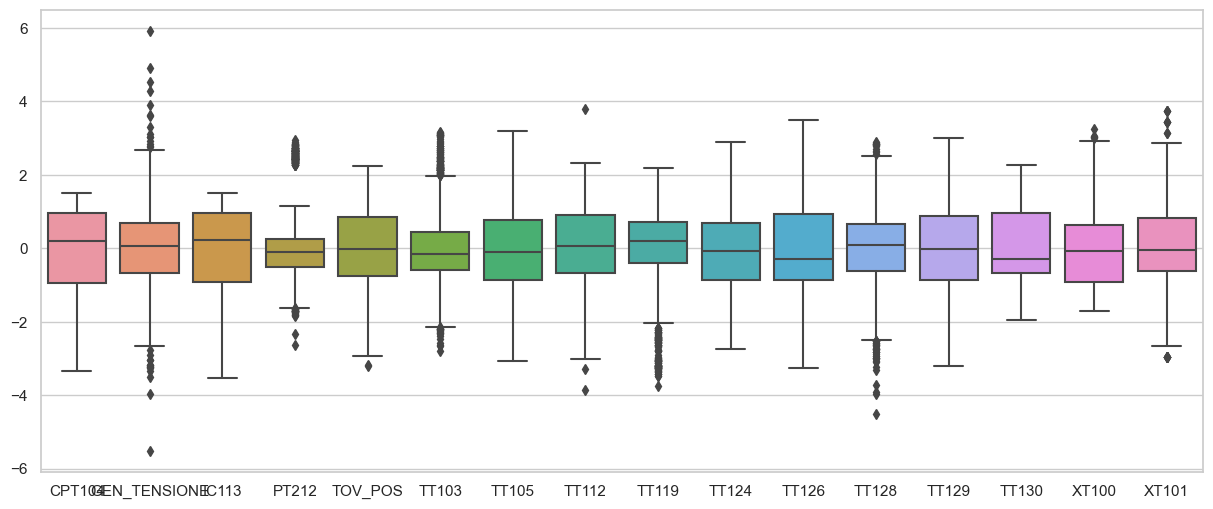

In [12]:
plt.figure(figsize=(15, 6))
sns.boxplot(data.drop('Fault', axis=1))

In [13]:
data_0 = data[data['Fault'] == 0]
data_1 = data[data['Fault'] == 1]
data_0.tail()

,CPT104,GEN_TENSIONE,IC113,PT212,TOV_POS,TT103,TT105,TT112,TT119,TT124,TT126,TT128,TT129,TT130,XT100,XT101,Fault
950,-1.121151,1.376824,-1.098849,-0.010701,-0.209288,0.852434,1.058176,-0.253079,-0.506963,-0.626763,-0.402807,0.643735,1.666868,-0.433234,-0.716952,0.240817,0
951,-1.137087,1.360748,-1.120520,-0.087417,-0.267206,0.316028,0.677019,-0.435368,-0.634968,-0.922985,-0.155767,0.485360,1.628968,-0.495416,-0.752079,-0.049988,0
952,-1.138681,-0.169074,-1.122931,-0.017506,0.189700,-0.282549,1.514397,-0.655737,-0.748203,-0.318589,-0.424491,0.446395,1.601041,-0.496683,-1.185321,0.531621,0
953,-1.143461,0.072076,-1.124416,0.018139,0.408499,0.832193,1.333257,-0.295742,-0.536896,-0.477197,-0.581648,0.582324,1.712880,-0.427323,-0.869171,0.240817,0
954,-1.303615,1.008330,-1.295179,-0.022528,0.775310,0.534350,1.116159,-0.460402,-0.632408,-0.725912,-0.586837,0.307234,1.617797,-0.533895,-0.506185,0.240817,0


<AxesSubplot: ylabel='Density'>

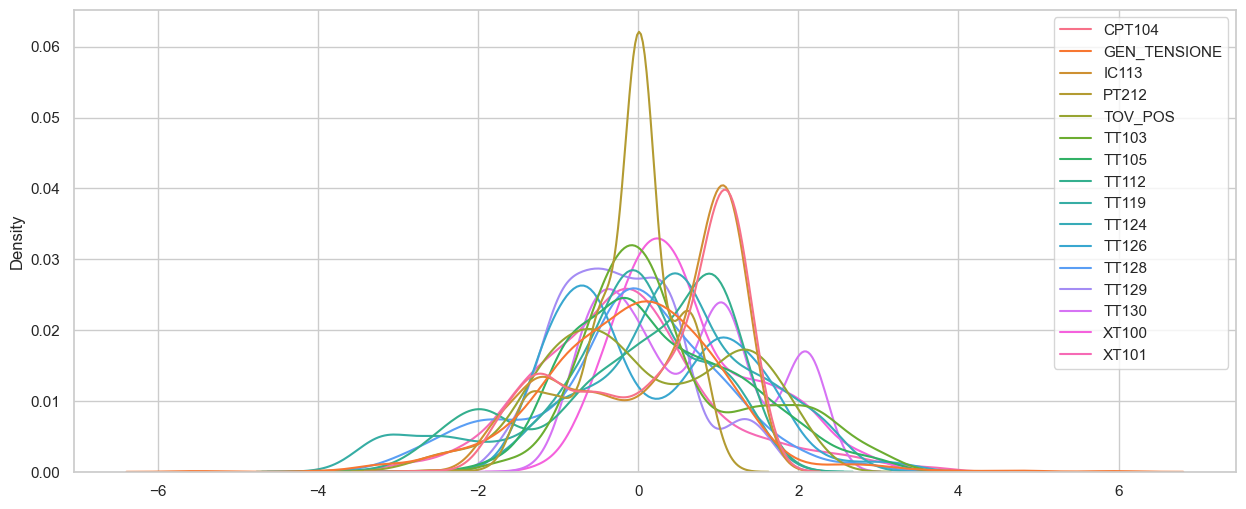

In [14]:
plt.figure(figsize=(15, 6))
sns.kdeplot(data_0.drop('Fault', axis=1))

<AxesSubplot: xlabel='XT100', ylabel='Density'>

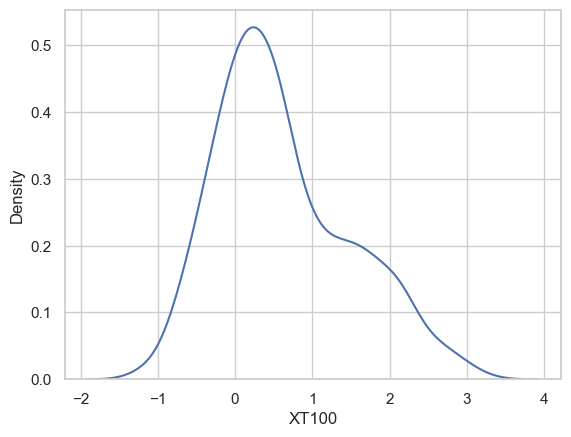

In [15]:
sns.kdeplot(data_0['XT100'])

In [16]:
stats.shapiro(data_0['XT100'])

ShapiroResult(statistic=0.9615543484687805, pvalue=2.9856224101083156e-14)